If you haven’t read readme.md, do it now please :)

In [228]:
import numpy as np


t0, t1 = 5, 50

np.random.seed(42)


def standardize(X):
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i] - np.mean(X[:,i]))/np.std(X[:,i])


def learning_schedule(t):
    return t0 / (t + t1)


def sigmoid(z):
    return 1.0/(1 + np.exp(-z))


def cost(X, theta):
    z = X.dot(theta)
    cost0 = y.T.dot(np.log(sigmoid(z)))
    cost1 = (1 - y).T.dot(np.log(1 - sigmoid(z)))
    cost_val = -((cost1 + cost0)) / len(y)

    return cost_val


def logistic_regression(X, y, theta, epoch, batch_size):
    random_idx = np.random.randint(X.shape[0] - batch_size)
    xi = X[random_idx:random_idx + batch_size + 1]
    yi = y[random_idx:random_idx + batch_size + 1]
    gradient = 1/xi.shape[0] * xi.T.dot(sigmoid(xi.dot(theta)) - np.reshape(yi, (len(yi), 1)))
    eta = learning_schedule(epoch * xi.shape[0] + 1)

    return theta - eta * gradient


def predict(X, theta):
    z = X.dot(theta)
    lis = []

    for i in sigmoid(z):
        if i>0.5:
            lis.append(1)
        else:
            lis.append(0)

    return lis


def plot_predictions(result):
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    y_pred = X_new_b.dot(result)

    plt.plot(X_new, y_pred, 'r-')
    plt.plot(X, y, 'b.')
    plt.axis([0, 2, 0, 15])

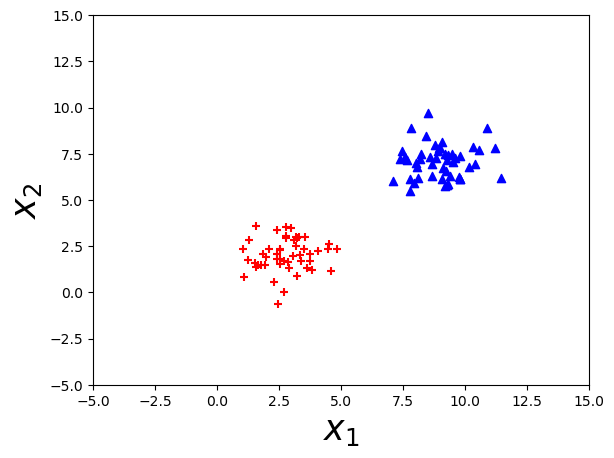

In [229]:
import matplotlib.pyplot as plt


x1 = np.random.normal(loc=3.0, size=50)
y1 = np.random.normal(loc=2.0, size=50)
x2 = np.random.normal(loc=9.0, size=50)
y2 = np.random.normal(loc=7.0, size=50)

plt.scatter(x1,y1,color='red', marker='+',s=35)
plt.scatter(x2,y2,color='blue', marker= '^',s=35)
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.show()

In [230]:
theta = np.zeros((2, 1))
n_epochs = 50
X = np.hstack((x1, x2)).reshape(-1, 1)
y_true = np.ones((50,))
y_false = np.zeros((50,))
y = np.hstack((y_true, y_false))
X_b = np.c_[np.ones((X.shape[0], 1)), X]
costs = []

for epoch in range(n_epochs):
    for i in range(X.shape[0]):
        theta = logistic_regression(X_b, y, theta, epoch, 10)
        cost_val = cost(X_b, theta)

        costs.append(cost_val)

all_preds = predict(X_b, theta)

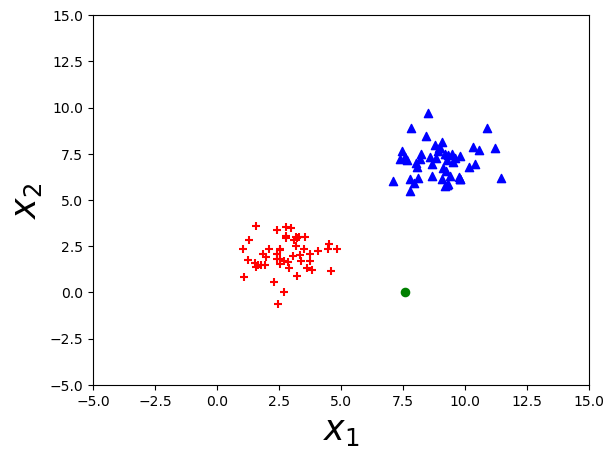

[0]

In [231]:
idx = 50

plt.clf()
plt.scatter(x1,y1,color='red', marker='+',s=35)
plt.scatter(x2,y2,color='blue', marker= '^',s=35)
plt.scatter(X[idx], y[idx], color='green', marker='o',s=35)
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.savefig('example.png', bbox_inches='tight')
plt.show()

predict(np.array([X_b[idx, :]]), theta)

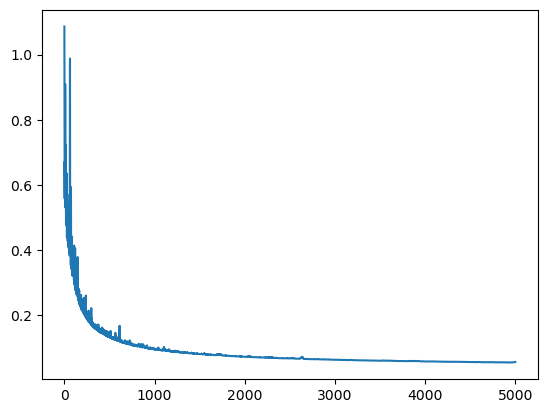

In [233]:
plt.clf()
plt.plot(list(range(len(costs))), costs)
plt.show()